## Cálculo do Retorno de uma Carteira de Ações


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [2]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.0714),
    ("ARZZ3.SA", 0.0250),
    ("LREN3.SA", 0.0250),
    ("GRND3.SA", 0.0250),
    ("LEVE3.SA", 0.0250),
    ("ABEV3.SA", 0.0500),
    ("MDIA3.SA", 0.0500),
    ("SLCE3.SA", 0.0500),
    ("PSSA3.SA", 0.0714),
    ("B3SA3.SA", 0.0500),
    ("ITUB3.SA", 0.0714),
    ("BBAS3.SA", 0.0714),
    ("RADL3.SA", 0.0500),
    ("ODPV3.SA", 0.0250),
    ("FLRY3.SA", 0.0250),
    ("HYPE3.SA", 0.0250),
    ("VIVT3.SA", 0.0500),
    ("SAPR3.SA", 0.0250),
    ("CPFE3.SA", 0.0714),
    ("EGIE3.SA", 0.0714),
    ("EQTL3.SA", 0.0714),
)

usa_tickers_n_weights = (
    ("AAPL", 0.0455),
    ("PG", 0.0455),
    ("NKE", 0.0455),
    ("BLK", 0.0455),
    ("JPM", 0.0455),
    ("JNJ", 0.0455),
    ("WST", 0.0455),
    ("UNH", 0.0455),
    ("MMM", 0.0000),
    ("TTC", 0.0455),
    ("DIS", 0.0455),
    ("ROST", 0.0455),
    ("COST", 0.0455),
    ("HD", 0.0455),
    ("EXPD", 0.0455),
    ("PAYX", 0.0455),
    ("FAST", 0.0455),
    ("GOOGL", 0.0455),
    ("TXN", 0.0455),
    ("ADBE", 0.0455),
    ("ANSS", 0.0455),
    ("ACN", 0.0455),
    ("MSFT", 0.0455),
)

usa_etf_tickers_n_weights = (
    ("VOO", 0.3000),
    ("TLT", 0.4000),
    ("IEF", 0.1500),
    ("IBIT", 0.0750),
    ("GLD", 0.07500),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [3]:
br_stock_data = pd.DataFrame()

usa_stock_data = pd.DataFrame()
usa_etf_stock_data = pd.DataFrame()

br_index_data = pd.DataFrame()
usa_index_data = pd.DataFrame()

start_date: str = "2011-02-02" # IPO ETF IBIT: 2024-01-11
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_etf_tickers_n_weights:
    ticker: str = t[0]
    usa_etf_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

usa_etf_stock_data["IBIT"].fillna(22.950001, inplace=True)

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

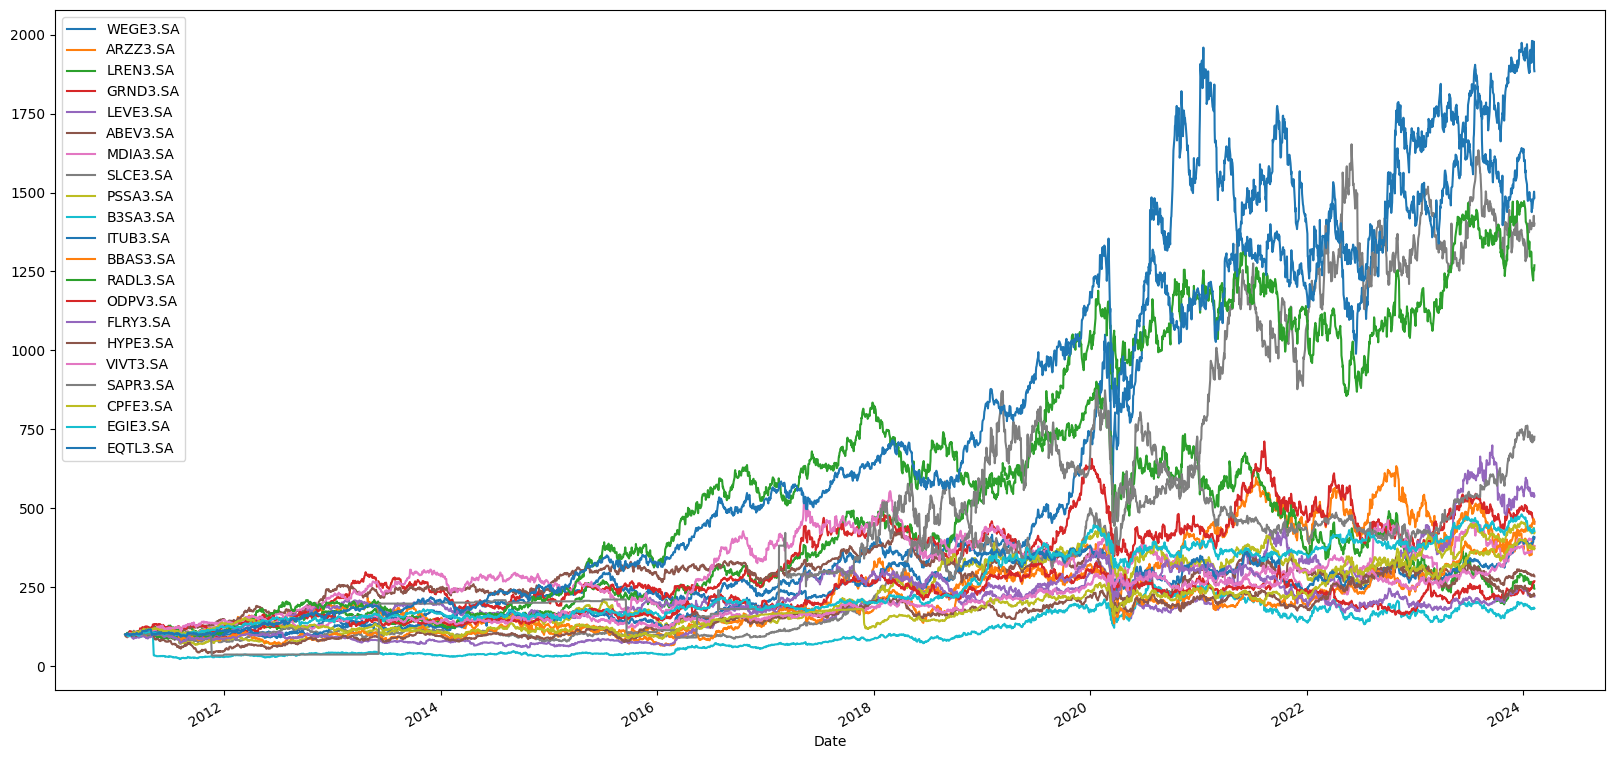

In [4]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

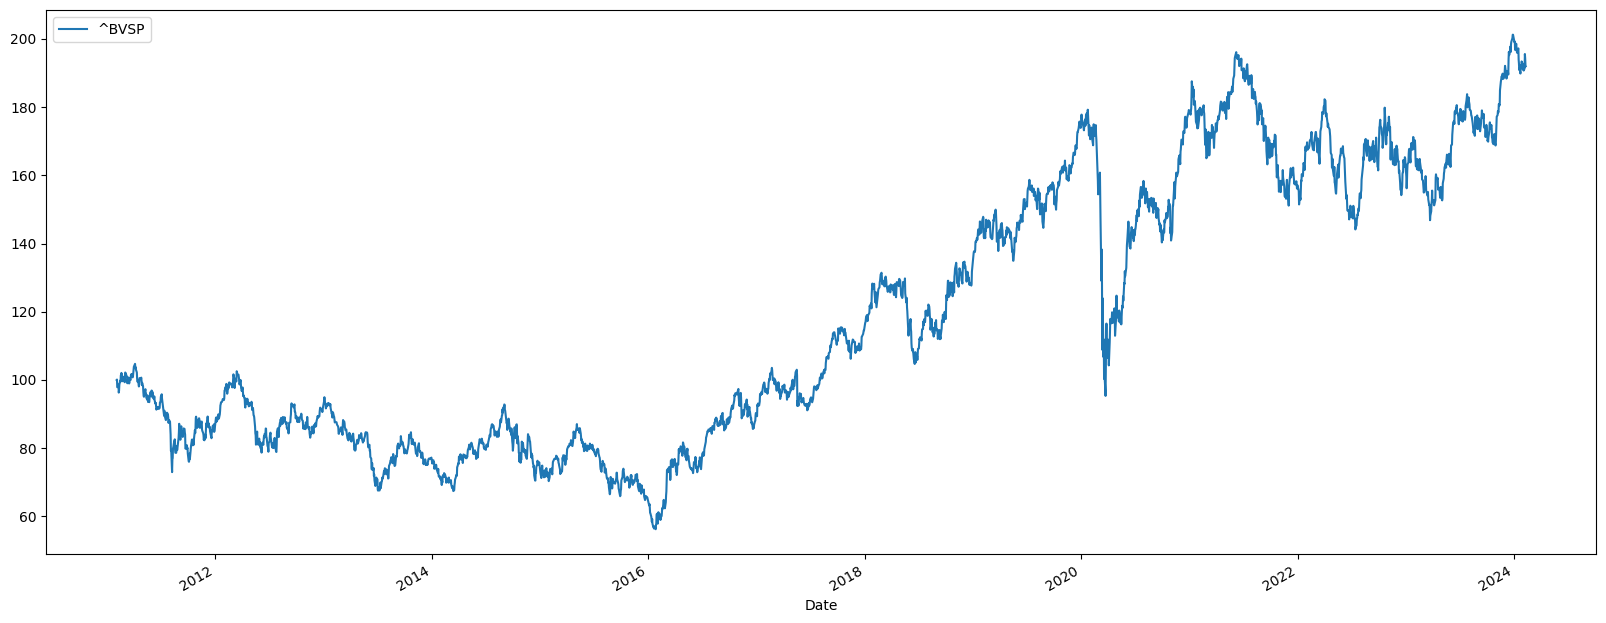

In [5]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

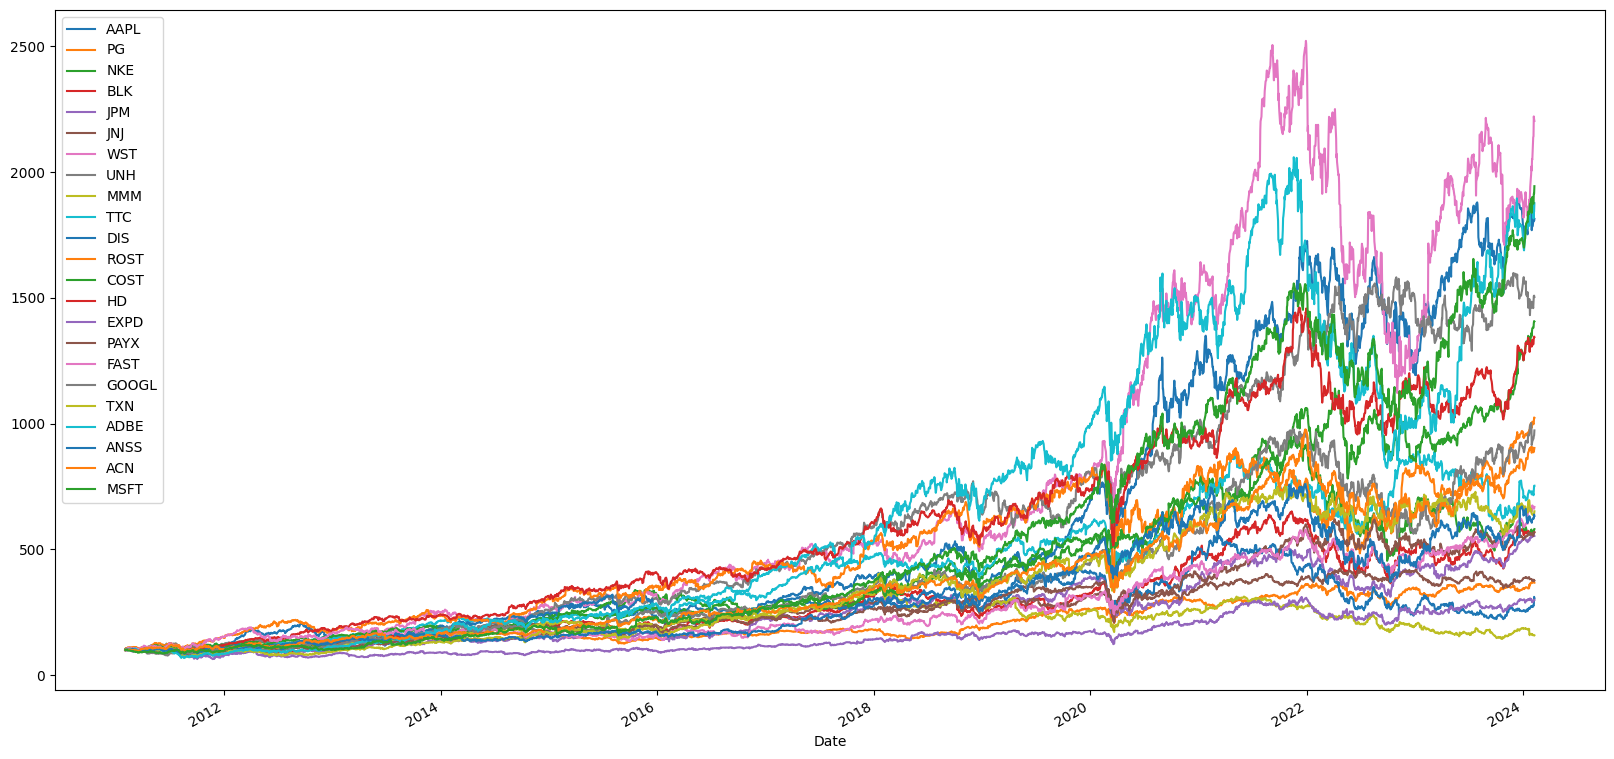

In [6]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado dos ETFs Americanos:

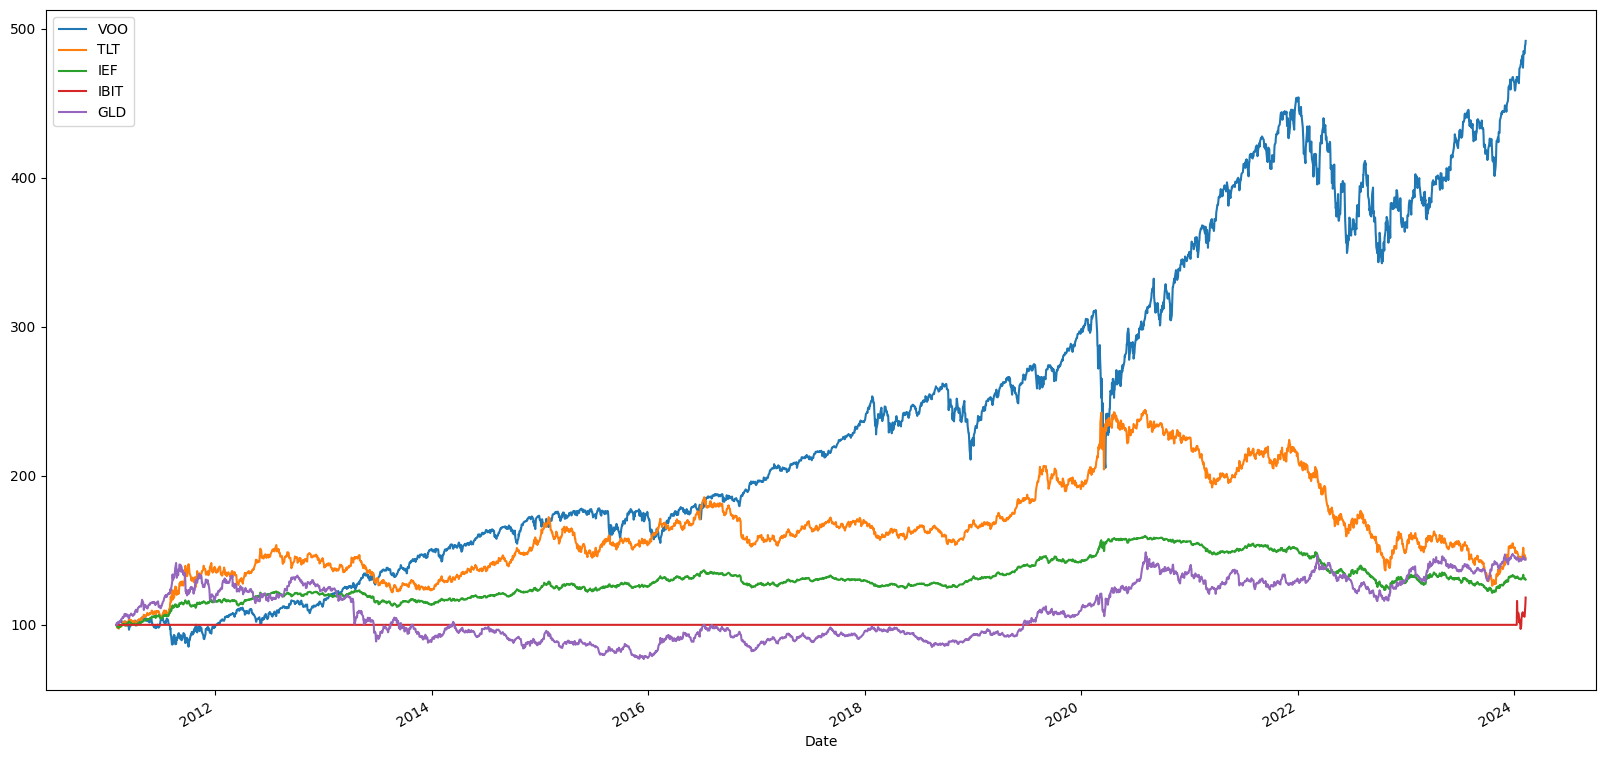

In [7]:
(usa_etf_stock_data / usa_etf_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

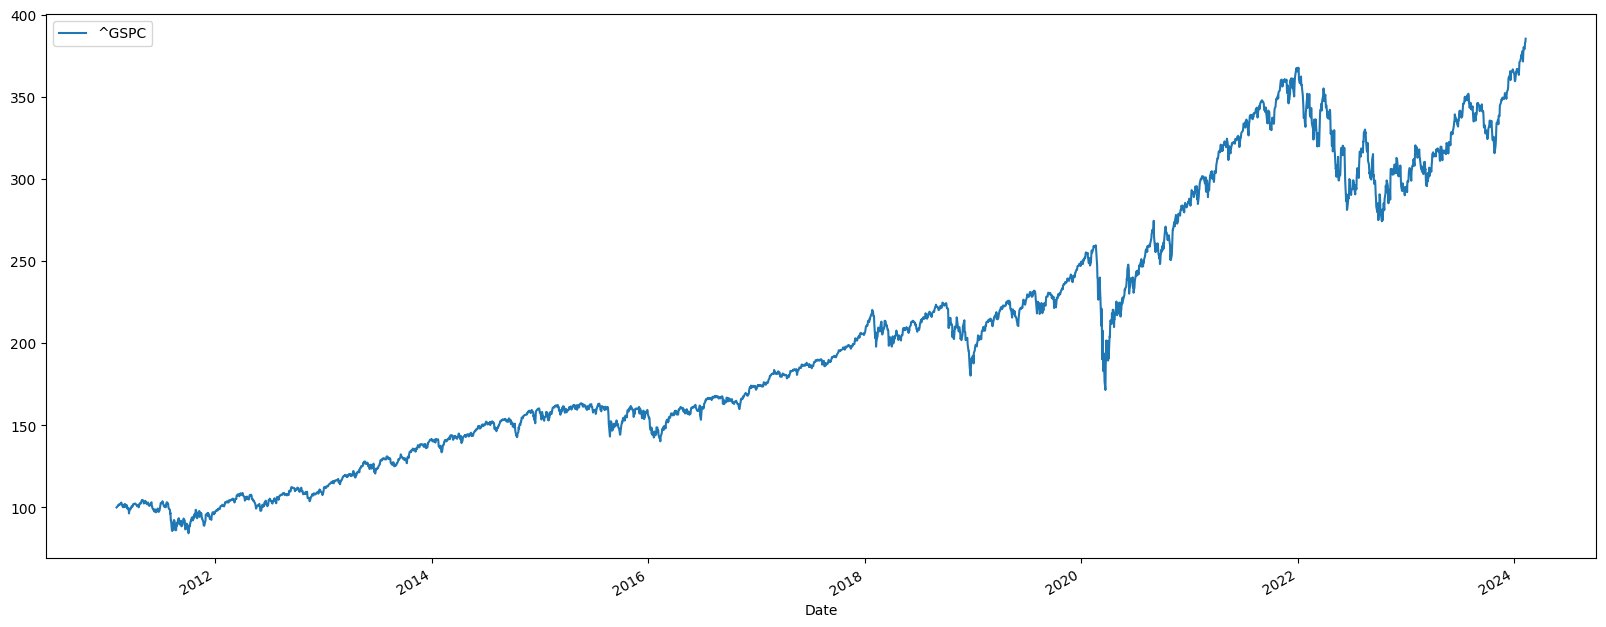

In [8]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [9]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1
usa_etf_returns = (usa_etf_stock_data / usa_etf_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [10]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])
usa_etf_weights = np.array([tw[1] for tw in usa_etf_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [11]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.258803
ARZZ3.SA    0.182062
LREN3.SA    0.142391
GRND3.SA    0.166817
LEVE3.SA    0.188781
ABEV3.SA    0.114684
MDIA3.SA    0.164974
SLCE3.SA    0.268415
PSSA3.SA    0.156218
B3SA3.SA    0.148836
ITUB3.SA    0.152044
BBAS3.SA    0.197903
RADL3.SA    0.246379
ODPV3.SA    0.125814
FLRY3.SA    0.111466
HYPE3.SA    0.118861
VIVT3.SA    0.143018
SAPR3.SA    0.504404
CPFE3.SA    0.140680
EGIE3.SA    0.140328
EQTL3.SA    0.263573
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [12]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

AAPL     0.261004
PG       0.114523
NKE      0.172794
BLK      0.170733
JPM      0.168813
JNJ      0.115540
WST      0.272575
UNH      0.238436
MMM      0.060629
TTC      0.183688
DIS      0.119889
ROST     0.221792
COST     0.222667
HD       0.225734
EXPD     0.112659
PAYX     0.158106
FAST     0.180516
GOOGL    0.210503
TXN      0.179242
ADBE     0.272102
ANSS     0.182574
ACN      0.197425
MSFT     0.260535
dtype: float64

In [13]:
usa_etf_annual_returns = usa_etf_returns.mean() * 250
usa_etf_annual_returns

VOO     0.136676
TLT     0.039956
IEF     0.022418
IBIT    0.014368
GLD     0.039525
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [14]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    (
        "Rentabilidade Média Anual do Portfólio ETFs USA:",
        usa_etf_annual_returns,
        usa_etf_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 18.63 %
Rentabilidade Média Anual do Índice BR: 8.02 %

Rentabilidade Média Anual do Portfólio USA: 19.30 %
Rentabilidade Média Anual do Portfólio ETFs USA: 6.44 %
Rentabilidade Média Anual do Índice USA: 11.82 %


O retorno desta carteira é satisfatório?
